#  Trabajo Práctico 2: Análisis con Árbol de decisión - Organización de Datos

**Alumnos y Padrón**  
* Grassano, Bruno - 103855  
* Romero, Adrián   - 103371

https://github.com/brunograssano/TP-Organizacion-de-datos

## Configuraciones iniciales

Cargamos las bibliotecas que se van a estar usando a lo largo de este notebook.

In [1]:
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

import graphviz

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
from preprocessing import prepararSetDeDatos
from preprocessing import prepararSetDeValidacion
from preprocessing import arbolDeDecisionPreprocessing

In [30]:
from sklearn.model_selection import GridSearchCV

In [25]:
from funcionesAuxiliares import mostrarAUCScore
from funcionesAuxiliares import mostrarROCCurve
from funcionesAuxiliares import mostrarMatrizDeConfusion
from funcionesAuxiliares import escribirPrediccionesAArchivo

## Carga y preparacion del set de datos

In [3]:
y = pd.read_csv('Datasets/tp-2020-2c-train-cols1.csv')
X = pd.read_csv('Datasets/tp-2020-2c-train-cols2.csv')

X = prepararSetDeDatos(X)
y = prepararSetDeValidacion(y)

X = arbolDeDecisionPreprocessing(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Árboles de decisión

Los árboles de decisición son algoritmos de aprendizaje supervisado utilizados para la clasificación. Se construyen iterativamente a partir de encontrar "el mejor feature" en cada iteración para agregar como nodo al árbol. 

Este feature se encuentra a partir de los criterios de impureza de Gini o de ganancia de información. Una vez encontrado el mejor feature, se agrega como nodo al árbol y luego se crean ramas para cada uno de los valores que puede tomar el feature.

Finalmente, cada hoja del arbol se asociara con una clase segun la cantidad de instancias de cada clase que le hayan llegado.

Los parámetros que se deben definir son:

**Profundidad máxima:** le impone un limite a la profundidad de máxima al árbol, los árboles muy profundos tienden a overfittear.

**Criterio:** es el criterio con el que se escoge el "mejor feature" para ocupar un nodo. Decimos que un feature es mejor que otro si maximiza la ganancia de información o si tiene baja impureza segun el criterio de impureza Gini.

In [48]:
arbol_clasificador = DecisionTreeClassifier()
arbol_clasificador = GridSearchCV(arbol_clasificador, {'criterion':('gini', 'entropy'), 'max_depth':[1,2,3,4,5,6,7,8,9,10]}, n_jobs = -1)
arbol_clasificador.fit(X_train, y_train)
y_pred = arbol_clasificador.predict(X_test)

In [49]:
arbol_clasificador.best_params_

{'criterion': 'gini', 'max_depth': 3}

### Evaluación de métricas

In [42]:
print(classification_report(y_pred, y_test, target_names=["Volveria", "No Voleria"]))

              precision    recall  f1-score   support

    Volveria       0.90      0.83      0.86       132
  No Voleria       0.71      0.83      0.77        69

    accuracy                           0.83       201
   macro avg       0.81      0.83      0.81       201
weighted avg       0.84      0.83      0.83       201



### Matriz de confusion

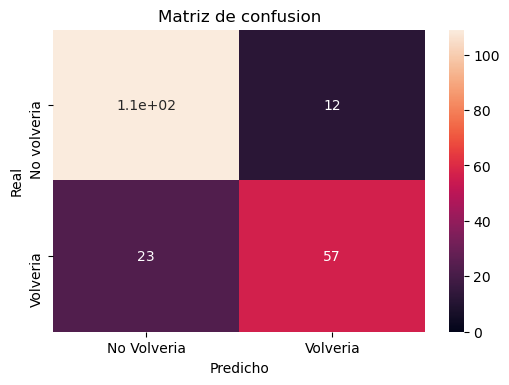

In [52]:
mostrarMatrizDeConfusion(y_pred,y_test)

Se observa que la matriz de confusión del árbol de decisión encontrado es muy buena. Un alto accuracy se puede ver claramente pues los valores de la diagonal invertida son significatimante menores que los de la diagonal principal.

De los 57 + 12 que el arbol predice que volverán, 57 efectivamente lo haría lo que indica un buen precision (83%)

El recall es un tanto mas bajo pues de los 23 + 57 que volverían, el arbol clasifica a 57 como personas que volverían, es decir detecta un poco mas de 2/3 de las personas que volverian (71%)

# Graficamos la curva ROC

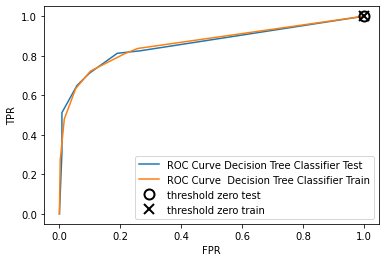

In [43]:
mostrarROCCurve(arbol_clasificador, "Decision Tree Classifier",X_test, X_train, y_test, y_train)

Podemos ver que las curvas ROC de train y test estan casi superpuestas indicando que no hay mucha diferencia entre la clasificacion sobre test y sobre train. Esto es bueno porque indica que el modelo encontrado no overfittea, probablemente debido a que la profundidad del arbol es de 3.

In [44]:
mostrarAUCScore(arbol_clasificador, "Decision Tree Classifier", X_test, y_test)

AUC para Decision Tree Classifier: 0.860


Es un AUC score muy bueno, sobre todo considerando que el clasificador de arbol de decision es uno de los mas simples. Ademas considerando que la profundidad del arbol es de 3, el arbol es muy simple. 